In [17]:
!pip install geopy
!pip install geopandas

In [17]:
import os
import sys

In [18]:
import matplotlib.pyplot as plt 
from voronoid import *
from drawvoronoid import *
import matplotlib.path as path
import matplotlib as mpl
import smopy
import pandas as pd
%matplotlib inline
import smopy
from scipy.spatial import Voronoi 
import random
import geopandas
import geopy
from geopy.geocoders import Nominatim

In [19]:
# decorater used to block function printing to the console
def blockPrinting(func):
    def func_wrapper(*args, **kwargs):
        # block all printing to the console
        sys.stdout = open(os.devnull, 'w')
        # call the method in question
        value = func(*args, **kwargs)
        # enable all printing to the console
        sys.stdout = sys.__stdout__
        # pass the return value of the method back
        return value

    return func_wrapper

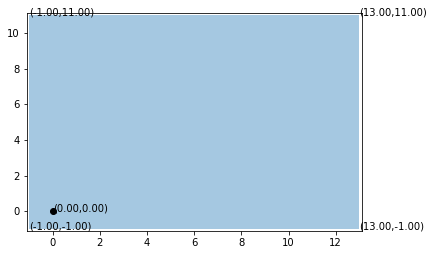

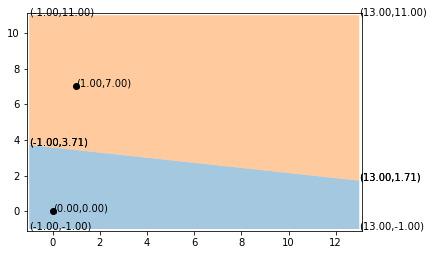

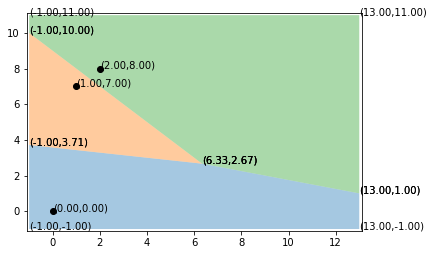

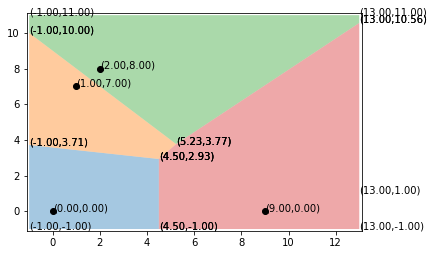

In [148]:
@blockPrinting
def findRegion(points, xmin=None, xmax=None, ymin=None, ymax=None):    
    new_regions = []
    xmin, xmax, ymin, ymax, finalpoints, regions = voronoid(points, xmin, xmax, ymin, ymax)
    regions = np.asarray(regions)
    for region in regions:
        region = np.asarray(region)
        c = region.mean(axis=0)
        angles = np.arctan2(region[:,1] - c[1], region[:,0] - c[0])
        region = np.array(region)[np.argsort(angles)]
        #polygon = vertices[region]
        new_regions.append(region)
    print(new_regions)
        
    return new_regions, finalpoints, xmin, xmax, ymin, ymax

        
        
def plotVoronoi(points, xmin=None, xmax=None, ymin=None, ymax=None):
    regions, finalpoints, xmin, xmax, ymin, ymax = findRegion(points, xmin, xmax, ymin, ymax)
    for region in regions:
        plt.fill(*zip(*region), alpha=0.4)
        for ver in region:
            plt.annotate('({:.2f},{:.2f})'.format(ver[0],ver[1]), (ver[0],ver[1]))
    for p in finalpoints:
        plt.annotate('({:.2f},{:.2f})'.format(p[0],p[1]), (p[0],p[1]))
                
                
                
        
    plt.plot(finalpoints[:,0], finalpoints[:,1], 'ko')
    #for p in finalpoints:
    #    plt.annotate('({:.2f},{:.2f})'.format(p[0],p[1]), (p[0],p[1]))
    plt.xlim(xmin - 0.1, xmax + 0.1)
    plt.ylim(ymin - 0.1, ymax + 0.1)


    plt.show()
    

np.random.seed(11)
points = np.random.randint(0, 10,(5,2))
points = [(x[0], x[1]) for x in points]
#points = [(0, 1), (1, 8), (9, 0), (9, 4), (10, 10)]
#n = len(points)
points = list(set(points))

xygraph = Xygraph(vl=points)
xmin = xygraph.xmin - 1
ymin = xygraph.ymin - 1
v = (xmin, ymin)
points.sort(key=lambda p: ((p[0]-v[0])**2 +
                               (p[1]-v[1])**2)**(1/2), reverse=True)
cur_points = []

for i in range(n):
    print(cur_points)
    cur_points.append(points.pop())
    plotVoronoi(cur_points, -1, 13, -1, 11)
    


In [21]:
hospitals = pd.read_csv('Hospitals.csv')[:10]
hospitals

,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
1,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N
2,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
3,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,(323) 462-2271,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N
4,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N
5,6,25190712,LAKEWOOD REGIONAL MEDICAL CENTER,3700 EAST SOUTH STREET,LAKEWOOD,CA,90712,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.lakewoodregional.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,172,NOT AVAILABLE,N
6,7,30791016,MONROVIA MEMORIAL HOSPITAL,323 SOUTH HELIOTROPE AVENUE,MONROVIA,CA,91016,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.monroviamemorial.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
7,8,30891754,MONTEREY PARK HOSPITAL,900 SOUTH ATLANTIC BOULEVARD,MONTEREY PARK,CA,91754,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.montereyparkhosp.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,101,NOT AVAILABLE,N
8,9,47090505,STAR VIEW ADOLESCENT - P H F,4025 WEST 226 STREET,TORRANCE,CA,90505,NOT AVAILABLE,NOT AVAILABLE,PSYCHIATRIC,...,2014/02/10 00:00:00,http://www.starsinc.com/,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,16,NOT AVAILABLE,N
9,10,9092879,CORONA REGIONAL MEDICAL CENTER-MAGNOLIA,730 MAGNOLIA AVENUE,CORONA,CA,92879,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.coronaregional.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,78,NOT AVAILABLE,N


In [27]:
address = hospitals.ADDRESS 
city = hospitals.CITY
state = hospitals.STATE 
zips = hospitals.ZIP.astype('str')


mapped = zip(address, city, state, zips)
mapped = list(mapped)
mapped

locations = [','.join(loc) for loc in mapped]
hospitals['address'] = locations

In [28]:
hospitals

,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,address
0,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N,"1025 NORTH DOUTY STREET,HANFORD,CA,93230"
1,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N,"150 VIA MERIDA,WESTLAKE VILAGE,CA,91362"
2,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N,"4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023"
3,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,(323) 462-2271,GENERAL ACUTE CARE,...,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N,"6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028"
4,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N,"14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706"
5,6,25190712,LAKEWOOD REGIONAL MEDICAL CENTER,3700 EAST SOUTH STREET,LAKEWOOD,CA,90712,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.lakewoodregional.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,172,NOT AVAILABLE,N,"3700 EAST SOUTH STREET,LAKEWOOD,CA,90712"
6,7,30791016,MONROVIA MEMORIAL HOSPITAL,323 SOUTH HELIOTROPE AVENUE,MONROVIA,CA,91016,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.monroviamemorial.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N,"323 SOUTH HELIOTROPE AVENUE,MONROVIA,CA,91016"
7,8,30891754,MONTEREY PARK HOSPITAL,900 SOUTH ATLANTIC BOULEVARD,MONTEREY PARK,CA,91754,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.montereyparkhosp.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,101,NOT AVAILABLE,N,"900 SOUTH ATLANTIC BOULEVARD,MONTEREY PARK,CA,..."
8,9,47090505,STAR VIEW ADOLESCENT - P H F,4025 WEST 226 STREET,TORRANCE,CA,90505,NOT AVAILABLE,NOT AVAILABLE,PSYCHIATRIC,...,http://www.starsinc.com/,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,16,NOT AVAILABLE,N,"4025 WEST 226 STREET,TORRANCE,CA,90505"
9,10,9092879,CORONA REGIONAL MEDICAL CENTER-MAGNOLIA,730 MAGNOLIA AVENUE,CORONA,CA,92879,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.coronaregional.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,78,NOT AVAILABLE,N,"730 MAGNOLIA AVENUE,CORONA,CA,92879"


In [29]:
locator = Nominatim(user_agent="myGeocoder")
addresses = [locator.geocode(location) for location in locations if locator.geocode(location)!= None]

In [30]:
latitudes = np.array([address.latitude for address in addresses])
longtitudes = np.array([address.longitude for address in addresses])

In [126]:
locations = [(34.09665955, -118.32532039012489),
 (34.023160250000004, -118.1843731349353),
 (34.04980485, -118.13808529561979),
 (34.06255465, -117.96774447903846)]

In [127]:
latitudes, longtitudes = zip(*locations)

In [130]:
box=(min(latitudes), min(longtitudes),
 max(latitudes), max(longtitudes))

In [131]:
m = smopy.Map(box, z=12)

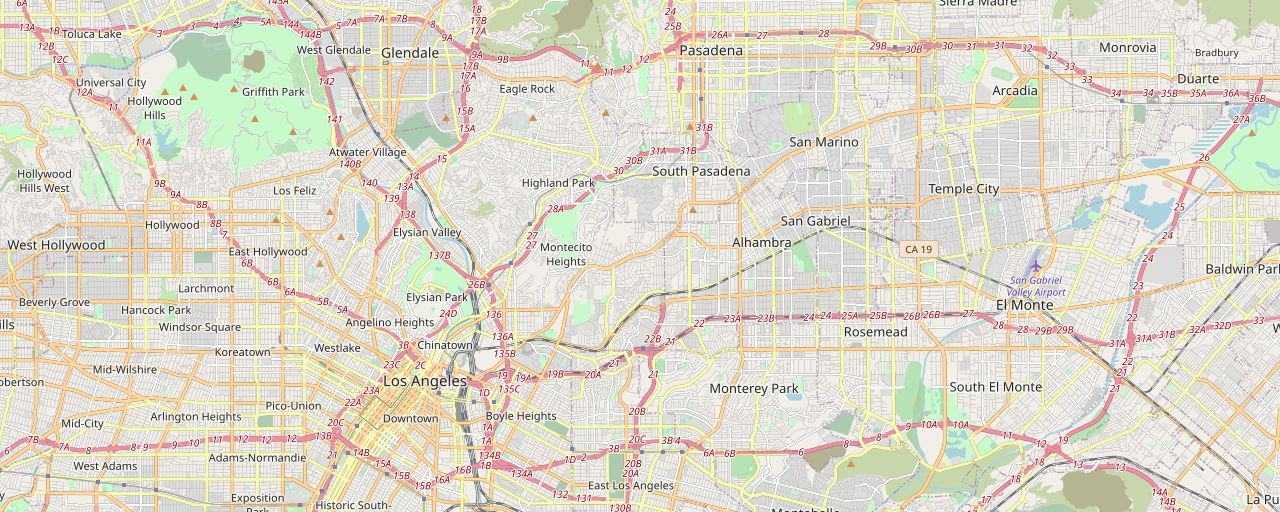

In [132]:
m.show_ipython()

In [133]:
regions, finalpoints, xmin, xmax, ymin, ymax = findRegion(locations)

In [135]:
cells = [m.to_pixels(region)
         for region in regions]

In [138]:
cmap = plt.cm.Set3
# We generate colors for districts using a color map.
colors_districts = cmap(
    np.linspace(0., 1., len(locations)))[:, :3]
# The color of every polygon, grey by default.
colors = .25 * np.ones((len(locations), 3))



In [141]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

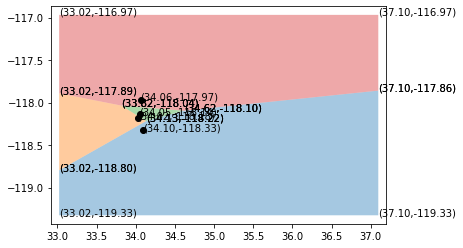

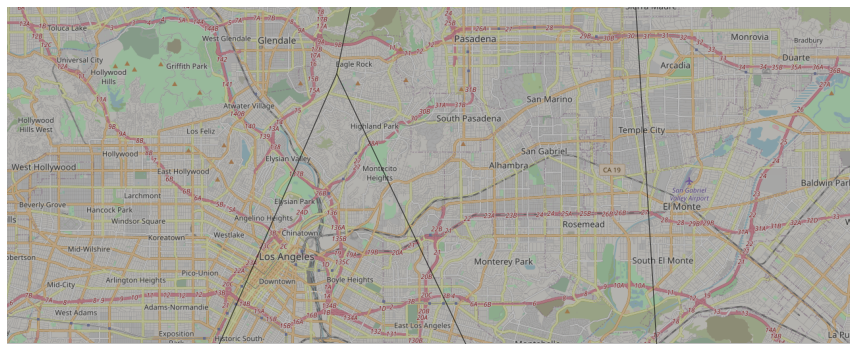

In [150]:
plotVoronoi(locations)
ax = m.show_mpl(figsize=(12, 8))
ax.add_collection(
    mpl.collections.PolyCollection(
        cells, facecolors=colors,
        edgecolors='k', alpha=.35))

